In [1]:
#!/usr/bin/env python

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from numpy import mean
from scipy.stats import norm

# Parameter Estimation<br>
In this example, we are going to estimate the parameters of a Bernoulli Distribution<br>
	where the data $\mathcal{D}$ consists of 4 successes and 6 failures. The methods are 

- Basic counting and recognizing the distributions<br>
- Maximum Likelihood<br>
- MAP<br>
- Bayesian Parameter Estimation

## [Alternative reference source](https://gregorygundersen.com/blog/2020/08/19/bernoulli-beta/)

## Basic counting and recognize distribution<br>
Using this approach, we simply need to recognize that this situation has a binary outcome.<br>
Given binary outcomes, the Bernoulli Distribution is commonly used as the default structure of the pdf.<br>
In general, if we approximate p(x) with Bernoulli, then we assume a structure of <br>
$$p(x) = \theta^x (1 - \theta)^{1 - x} \quad \text{where} \quad x \in \{0,1\}.$$

According to Bernoulli distribution, the $\theta$ is the probability of success 4/10,<br>
and failure is $1 - \theta = 6/10$. So in this example, the p(x) would be:

$$ p(x) = \frac{4}{10}^x \frac{6}{10}^{1 - x} \quad \text{where} \quad x \in \{0,1\}.$$

## Maximum Likelihood (MLE)<br>
In MLE, we find the $\theta$ that maximizes the joint log likelihood distribution. Therefore, we have<br>
$$ \max_{\theta} \; \log(\mathcal{L}) = \log \left( \prod_{i=1}^n \; \theta^{x_i} (1 - \theta)^{1 - x_i} \right)$$<br>
With this objective, we simply take the derivative of the objective and set it to 0, giving us <br>
$$\theta = \frac{1}{n} \sum_i \; x_i.$$<br>
This is the exact same conclusion as the previous section where $\theta = 4/10$, giving us the same $p(x)$<br>
$$ p(x) = \frac{4}{10}^x \frac{6}{10}^{1 - x} \quad \text{where} \quad x \in \{0,1\}.$$

## Maximum A Posteriori Estimation (MAP)<br>
The MAP estimation is more complicated. Here, instead of maximizing the $p(X=\mathcal{D}|\theta)$, we want to find $\max \; p(\theta|X=\mathcal{D})$. <br>
In other word, we want to find the most likely $\theta$ giving the entire dataset $X=\mathcal{D}$.<br>
Take a quick second to distinguish the difference between MLE and MAP<br>
- MLE : <br>
$$ \max_{\theta} \; p(X=\mathcal{D}|\theta) $$<br>
- MAP : <br>
$$ \max_{\theta} \; p(\theta|X=\mathcal{D}) $$<br>
With this method, we use the Bayes' Theorem <br>
$$ p(\theta | X=\mathcal{D}) = \frac{p(X=\mathcal{D}|\theta) p(\theta)}{p(X=\mathcal{D})} $$<br>
From MLE, we knew tht <br>
$$p(X=\mathcal{D}|\theta) = \mathcal{L} = \prod_{i=1}^n \; \theta^{x_i} (1 - \theta)^{1 - x_i}$$<br>
- With MLE, the likelihood function is sufficient. <br>
- With MAP, it allow us to use prior knowledge about the distribution of $\theta$. The MAP estimate consequently combines our prior knowledge with the data and come up with the best estimation. <br>
- In this particular example, we use a beta distribution with $\alpha = 2, \beta = 5$. <br>
$$ p(\theta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} \theta^{\alpha - 1} (1 - \theta)^{\beta - 1} \quad \text{where if $n$ is an integer then} \quad \Gamma(n) = (n-1)!$$<br>
Note that the $\Gamma(z)$ function is much more complicated if $z$ is not an integer, specifically, it is <br>
$$ \Gamma(z) = \int_0^{\infty} \; t^{z - 1} e^{-t} \; dt $$

Below, we draw out this beta distribution.<br>
- Note that the reason why we picked a Beta distribution is because it is the conjugate prior to a Bernoulli distribution

In [3]:
α, β = 2, 5
x = np.linspace(0, 1, 1000)

Calculate beta distribution

In [4]:
pdf = beta.pdf(x, α, β)

Plot

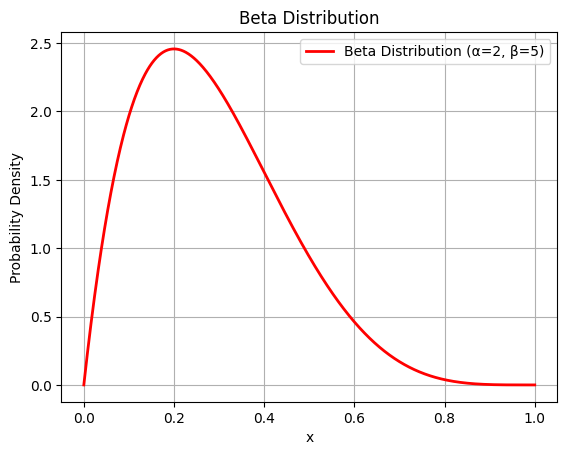

In [5]:
plt.plot(x, pdf, 'r-', lw=2, label='Beta Distribution (α={}, β={})'.format(α, β))
plt.title('Beta Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

Imagine we have a situation where want to model the skill level of an individual (candidate evaluation)<br>
- We can rank a person's skill level between 0 and 1, where 1 implies maximum skill level. <br>
- The skill level is also the probability that a person would successfully perform a task<br>
- After collecting data about the general population, we set the prior around 0.2 as the mean value as shown in the plot above.<br>
- This implies that most people have a skill level of 0.2 out of 1 with very few candidates above 0.8. <br>
- Next, imagine that a candidate successfully achieved the task the first 4 times and failed in the last 6. <br>
- Given these results from the candidate, can we combine it with the prior knowledge to evaluate the skill level of this candidate?

###	Applying MAP as Conjugate Priors<br>
When we apply MAP, we want to <br>
$$\max_{\theta}\; p(\theta|X=\mathcal{D}) = \frac{p(X=\mathcal{D}|\theta) p(\theta)}{p(X=\mathcal{D})} $$<br>
From the description above, we know that the prior is a beta distribution<br>
$$ p(\theta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} \theta^{\alpha - 1} (1 - \theta)^{\beta - 1} \quad \text{where if $n$ is an integer then} \quad \Gamma(n) = (n-1)!$$<br>
Since $\alpha$ and $\beta$ are integers, we have<br>
$$ p(\theta) = \frac{\Gamma(2 + 5)}{\Gamma(2)\Gamma(5)} \theta^{1} (1 - \theta)^{4} $$<br>
$$ p(\theta) = 30 \theta^{1} (1 - \theta)^{4} $$<br>
We also know the likelihood function as a Bernoulli distribution<br>
$$ \mathcal{L} =  \prod_{i=1}^n \; \theta^{x_i} (1 - \theta)^{1 - x_i} = \theta^{\sum_i x_i} (1 - \theta)^{\sum_i (1 - x_i)} $$<br>
Therefore, we have<br>
$$ p(\theta | X=\mathcal{D}) = \frac{\left( \theta^{\sum_i x_i} (1 - \theta)^{\sum_i (1 - x_i)} \right) \left( 30 \theta^{1} (1 - \theta)^{4} \right)}{p(X=\mathcal{D})} $$<br>
Remember that for success $x_i = 1$ and failure $x_i = 0$, therefore, we can combine everything together as <br>
$$ p(\theta | X=\mathcal{D}) = \frac{ 30 \theta^{5} (1 - \theta)^{10} }{p(X=\mathcal{D})} $$<br>
At this point, pay special attention to <br>
- Since $X=\mathcal{D}$ is given, $p(X=\mathcal{D})$ is simply a constant<br>
- Together to 30, we can simply set $30/p(X)$ as a constant value $c$, giving us<br>
$$ p(\theta | X=\mathcal{D}) =  c \theta^{5} (1 - \theta)^{10} $$<br>
- Now pay special attention on the structure of Beta distribution <br>
$$ p(\theta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} \theta^{\alpha - 1} (1 - \theta)^{\beta - 1} \quad \text{where if $n$ is an integer then} \quad \Gamma(n) = (n-1)!$$<br>
- Realize that what we have is basically a beta distribution if we rearrange it to  <br>
$$ p(\theta | X=\mathcal{D}) =  c \theta^{6 - 1} (1 - \theta)^{11 - 1} $$<br>
This implies that $\alpha = 6, \beta = 11$ and <br>
$$ c = \frac{\Gamma(6 + 11)}{\Gamma(6)\Gamma(11)} $$<br>
Imply that we have a posterior distribution of<br>
$$ p(\theta|X=\mathcal{D}) = \frac{\Gamma(6 + 11)}{\Gamma(6)\Gamma(11)} \theta^{6 - 1} (1 - \theta)^{11 - 1}$$<br>
$$ p(\theta|X=\mathcal{D}) = 48048 \theta^{6 - 1} (1 - \theta)^{11 - 1}$$

Below, we draw out this beta distribution of the posterior

In [6]:
α, β = 6, 11
x2 = np.linspace(0, 1, 1000)

Calculate beta distribution

In [7]:
pdf2 = beta.pdf(x2, α, β)

Plot

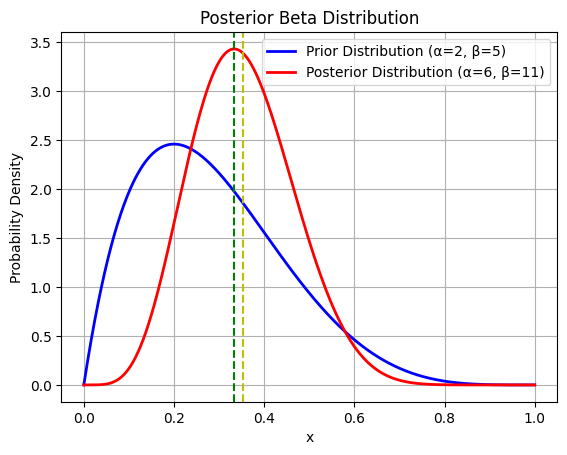

In [8]:
plt.plot(x, pdf, 'b-', lw=2, label='Prior Distribution (α={}, β={})'.format(2, 5))
plt.plot(x2, pdf2, 'r-', lw=2, label='Posterior Distribution (α={}, β={})'.format(α, β))
plt.axvline(x=(1/3), color='g', linestyle='--')
plt.axvline(x=(6/17), color='y', linestyle='--')
plt.title('Posterior Beta Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

- Notice prior to the candidate's performance we had a general sense of the total population and we called it the __prior distribution__.<br>
- However, after the candidate's performance, we combined our prior knowledge with the performance and came up with the __posterior distribution__ describing the distribution of the candidate's abilities. <br>
- This result allows us to ask various questions about the candidate.<br>
	- What is the most likely $p(\theta|X=\mathcal{D})$ (MAP)? <br>
	- What is the probability that the candidate is better than the average candidate? 

## MAP solution<br>
From the previous example, we see that the posterior is a Beta distribution <br>
$$ p(\theta|X=\mathcal{D}) = 48048 \theta^{6 - 1} (1 - \theta)^{11 - 1}$$<br>
with $\alpha = 6, \beta=11$. <br>
Given that we know both $\alpha, \beta$ of the Beta distribution, the equation for $E[p(\theta|X=\mathcal{D})]$ and $\max_{\theta} \; p(\theta|X)$ is already known as

$$E[p(\theta|X=\mathcal{D})] = \frac{\alpha}{\alpha + \beta} = \frac{6}{6 + 11} = \frac{6}{17}.$$<br>
$$\max_\theta p(\theta|X=\mathcal{D}) = \frac{\alpha - 1}{\alpha + \beta - 2} = \frac{1}{3}.$$

- Look at the plot above and notice that at 1/3 is the green line and it corresponds with highest point of $p(\theta|X=\mathcal{D})$ (This is the MAP solution).<br>
- Also see at at 6/17 $\approx$ 0.353, that's the expected point. 

## The Bayesian Parameter Estimation<br>
To find the parameter, we can set $\theta$ to <br>
- MLE : <br>
$$\max_{\theta} \; p(X=\mathcal{D}|\theta)$$<br>
- MAP : <br>
$$\max_{\theta} \; p(\theta|X=\mathcal{D})$$<br>
- __Bayesian Parameter Estimation__ : <br>
$$p(\theta|X=\mathcal{D})$$

Notice that for  __Bayesian Parameter Estimation__, the resulting $\theta$ is not a number. <br>
Instead, it is a distribution of the posterior. <br>
- So Bayesian Parameter Estimation doesn't just give us the most likely $\theta$ <br>
- It tells us the likelihood of $\theta$ being various numbers. <br>
- The MAP solution is simply the highest point of $p(\theta|X)$ <br>
- While the Bayesian solution is a distribution, we could also get a number as the "best" $\theta$<br>
- For Bayesian, the best is considered the expectation of $p(\theta|X)$, or $E[p(\theta|X)]$.

We see from above that <br>
- The posterior is <br>
$$ p(\theta|X=\mathcal{D}) = 48048 \theta^{6 - 1} (1 - \theta)^{11 - 1}$$<br>
- And the best $\theta$ is $E[p(\theta|X)]$<br>
$$E[p(\theta|X=\mathcal{D})] = \frac{\alpha}{\alpha + \beta} = \frac{6}{6 + 11} = \frac{6}{17}.$$ (This is the best Bayesian Parameter Estimation for $\theta$.)

## Solving Bayesian Parameter Estimation Via Rejection Sampling<br>
In this particular case, the Likelihood function is a product of Bernoulli distributions and the prior is a Beta distribution. <br>
- For this particular case, we got lucky and the posterior is the same as the prior. <br>
- In general, we try really hard to pick priors that gives us the same posterior distribution<br>
- This is because it allows us to obtain the posterior easily.<br>
- The prior distribution that allows us to easily obtain the posterior is called the __Conjugate Priors__.<br>
- Unfortunately, many of the real world problems aren't conjugate priors.<br>
- How then, do we get the posterior distribution?   __Answer__ : Sampling. 

### Key Realization<br>
- We look at the defintion of conditional probability to get the first key realization<br>
$$ p(\theta|X=\mathcal{D}) = \frac{p(\theta, X=\mathcal{D})}{p(X=\mathcal{D})} = \frac{p(X=\mathcal{D}|\theta) p(\theta)}{p(X=\mathcal{D})}. $$<br>
- If we are looking for $p(\theta|X=\mathcal{D})$, then the dataset $X$ must be already given. <br>
- Therefore, $X$ is a constant and the joint distribution $p(\theta,X=\mathcal{D})$ = p(\theta)$ where $X=\mathcal{D}$ can be ignored.<br>
$$p(\theta|X=\mathcal{D}) = c p(\theta) $$<br>
- Note that $p(\theta)$ alone is NOT a proper distribution since it doesn't add up to 1<br>
- We must multiply $p(\theta)$ to $c$ to scale it. <br>
- However, we can still sample from $p(\theta)$ as a surrogate to get the samples for $p(\theta|X=\mathcal{D})$.

### Applying this Realization to the Current example. <br>
Remember that we are trying to find the posterior distribution with Bayesian Parameter Estimation<br>
$$p(\theta|X=\mathcal{D}) = \frac{p(X=\mathcal{D}|\theta) p(\theta)}{p(X=\mathcal{D})} $$<br>
If we plug the given data $X=\mathcal{D}$ into the joint distribution, we get<br>
$$ p(\theta|X=\mathcal{D}) = c \; \theta^{6 - 1} (1 - \theta)^{11 - 1}$$<br>
- Obviusly, due to conjugacy, we knew that the posterior is a beta distribution with the constant <br>
$$ c = \frac{\Gamma(6 + 11)}{\Gamma(6)\Gamma(11)}$$.<br>
- However, in this example, we are going to pretend that we don't know the posterior <br>
- We only know that the posterior is the joint times a constant $c$ <br>
$$ p(\theta|X=\mathcal{D}) = c p(\theta, X=\mathcal{D}) = c \; \theta^{6 - 1} (1 - \theta)^{11 - 1}$$<br>
- Our key realization says that if we simply sample from $c p(\theta,X=\mathcal{D})$, we would get the samples from $p(\theta|X=\mathcal{D})$.<br>
- There are many ways to perform sampling, however, since we don't know $c$, we need to pick a way that doesn't care about the constant $c$.<br>
- __Rejection Sampling__ for this case is idea since $c$ can be any value as long as the proposal distribution is larger.

### Setting up Rejection Sampling<br>
- Here, we are going to use a Gaussian distribution as the proposal q(x)<br>
- And we are going to pick 16000 as c for p(x)

In [9]:
def q(x): return norm.pdf(x, loc=(1/3), scale=(1/np.sqrt(10)))
def p(x): return 16000*x**5*(1-x)**10

### Remember that the q(x) must always be higher than p(x)<br>
- Here we show that q(x) is always higher than p(x)

In [10]:
x = np.linspace(0, 1, 200)
y1 = q(x)
y2 = p(x)

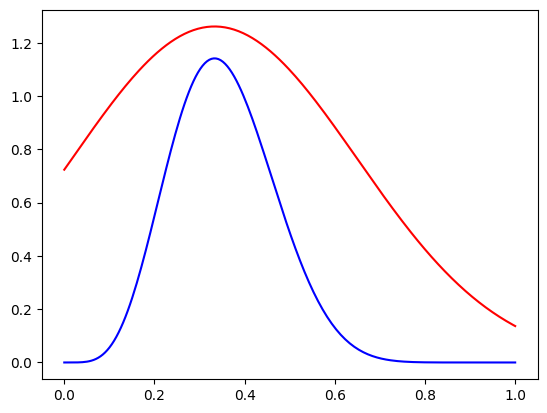

In [11]:
plt.plot(x,y1, color='red')
plt.plot(x,y2, color='blue')
plt.show()

### Performing Rejection Sampling<br>
- In rejection sampling, we first sample from the proposal distribution<br>
- We then decide if we should keep the sample with the following rule<br>
	- given a sample from the q(x)<br>
	- we sample from a uniform distribution between 0 to q(x) and call this cample v<br>
	- if v is greater than p(x), then we accept, otherwise, we reject<br>
- In this case, $0 \ge \theta \ge 1$, so we automatically reject any samples outside of that range. 

In [12]:
X = norm.rvs(loc=1/3, scale=1/np.sqrt(10), size=20000)
accepted_samples = []
for x in X:
	if x < 0 or x > 1: continue
	u = q(x)
	v = u*np.random.rand()
	px = p(x)
	if v < px:
		accepted_samples.append(x)

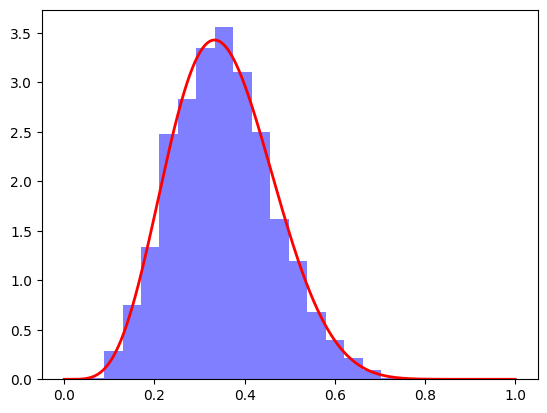

In [13]:
n, bins, patches = plt.hist(accepted_samples, 20, facecolor='blue', density=True, alpha=0.5)
plt.plot(x2, pdf2, 'r-', lw=2, label='Posterior Distribution (α={}, β={})'.format(α, β))
plt.show()

In [14]:
print('We accepted : %d samples.'%len(accepted_samples))
print('Bayes E[p(θ|X)] = %.4f' % np.mean(accepted_samples))

We accepted : 6591 samples.
Bayes E[p(θ|X)] = 0.3525


### Note<br>
- We plotted out the histogram generated from rejection sampling. <br>
- On top, we superimposed the true theoretical Beta distribution.<br>
- Notice how the samples matched very closely to the true distribution.<br>
- Notice that the approximate E[p(θ|X=\mathcal{D})] = 0.3525 is very close to the true solution of 0.353.

## Predictive Posterior<br>
- finding the parameter is necessary, however, our goal is to find $p(x)$ that describes the data<br>
- We can get it through marginalizing out $\theta$ from $p(x,\theta)$<br>
$$p(x) = \int_0^1 \; p(x|\theta) p(\theta) \; d\theta $$<br>
- note that we found $p(\theta)$ previously using Bayesian Parameter estimation where<br>
$$ p(\theta|X=\mathcal{D}) = c p(\theta, X=\mathcal{D}) = c \; \theta^{6 - 1} (1 - \theta)^{11 - 1}$$

For Bernoulli with Beta prior, it is easy since x can only be 0 or 1<br>
$$p(x) = \int_0^1 \;  \theta^x (1 - \theta)^{1 - x}  \left( \frac{1}{B(6,11)} \; \theta^{6 - 1} (1 - \theta)^{11 - 1} \right) \; d\theta $$<br>
$$p(x=1) = \int_0^1 \;  \theta \left( \frac{1}{B(6,11)} \; \theta^{6 - 1} (1 - \theta)^{11 - 1} \right) \; d\theta $$<br>
This is the definition of the expectation of the beta distribution (which is known), therefore<br>
$$p(x=1) = \frac{\alpha}{\alpha + \beta} \approx 0.353$$<br>
If we continue to follow this logic for x=0, then<br>
$$p(x=0) = \frac{\beta}{\alpha + \beta} \approx 0.647$$<br>
Together, the final $p(x)$ is<br>
$$ p(x) = \frac{\alpha^x \beta^{1 - x}}{\alpha + \beta} = \frac{6^x 11^{1 - x}}{17}$$

## Predictive Posterior Via Sampling<br>
- In our example, it was easy to find the predictive posterior $p(x)$ since it turns out to be the expectation of Beta distribution.<br>
- However, if we look at the equation carefully<br>
$$p(x) = \int_0^1 \; p(x|\theta) p(\theta) \; d\theta $$<br>
- $p(x|\theta)$ could have been a much more complicated distribution, and the Predictive Posterior is not as obvious<br>
- in this case, we can still approximate the solution via sampling. <br>
### Realize that the question is asking the probability of $x = \tilde{x}$ in $p(x = \tilde{x})$<br>
- Therefore, we know $x = \tilde{x}$, implying that<br>
$$p(x = \tilde{x}) = \int_0^1 \; p(x=\tilde{x}|\theta) p(\theta) \; d\theta $$<br>
- When we plug $\tilde{x}$ into $p(x=\tilde{x}|\theta)$, it become just a function of $\theta$ like $q(\theta)$, resulting in the approximation of <br>
$$p(x) = \int_0^1 \; q(\theta) p(\theta) \; d\theta = E_{p(\theta)}[q(\theta)] \approx \frac{1}{n} \sum_i \; q(\theta).$$<br>
This implies that if we simply generate samples from $p(\theta)$, plug into $q(\theta)$ and average the resulting values, we would get $p(x=\tilde{x})$.

Generate samples from Beta

In [15]:
px1 = mean(beta.rvs(6, 11, size=10000))
px0 = 1 - px1

In [16]:
print('Notice these results match the p(x=0), p(x=1) from above')
print('p(x=1) = %.4f , p(x=0) = %.4f.'%(px1, px0))

Notice these results match the p(x=0), p(x=1) from above
p(x=1) = 0.3530 , p(x=0) = 0.6470.
